# 4.10 IC Profile Age

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Profiling Variable: Age <br>
 > 04.01 Distribution of Profiles <br>
 > 04.02 Descriptive Statistics for each profiled segment <br>
 > 04.03 Relationship with profiles and regions / departments <br>

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
df.shape

(30964564, 32)

## 04 Profiling Variable: Age

In [6]:
# Create profile variable for Early Adult
df.loc[(df['age'] <= 25),'profile_age'] = "Early Adult"

In [7]:
# Create profile variable for Young
df.loc[(df['age'] >= 26) & (df['age'] <=39),'profile_age'] = "Young"

In [8]:
# Create profile variable for Middle
df.loc[(df['age'] >= 40) & (df['age'] <=59),'profile_age'] = "Middle"

In [9]:
# Create profile variable for Older
df.loc[(df['age'] >= 60),'profile_age'] = "Older"

In [10]:
# Check counts
df['profile_age'].value_counts(dropna = False)

Older          10574504
Middle          9724950
Young           6800592
Early Adult     3864518
Name: profile_age, dtype: int64

### 04.01 Distribution of Profiles

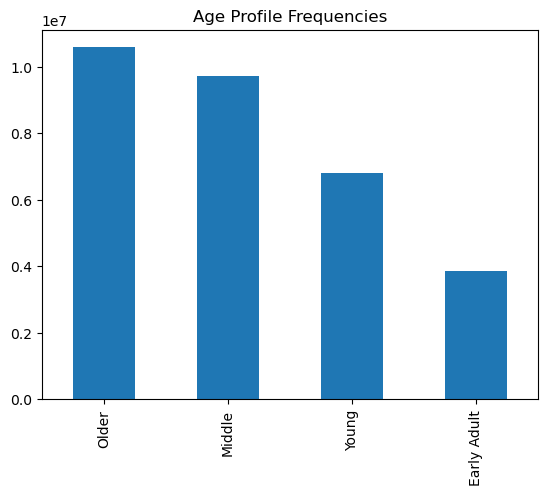

In [11]:
# Bar graph by profiled segment
bar_profile_age = df['profile_age'].value_counts().plot.bar(title='Age Profile Frequencies')

In [12]:
# Export bar chart
bar_profile_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age.png'),bbox_inches='tight')

### 04.02 Descriptive Statistics for each profiled segment

In [13]:
# Comparing mean, min, max for each profile group
df.groupby('profile_age').agg({'prices': ['mean','min','max']})

prices           
                 mean  min   max
profile_age                     
Early Adult  7.784889  1.0  25.0
Middle       7.791641  1.0  25.0
Older        7.795446  1.0  25.0
Young        7.784777  1.0  25.0

In [14]:
# Comparing the total of prices for each profile group
df.groupby('profile_age').agg({'prices': ['sum']})

,prices
,sum
profile_age,
Early Adult,30079773.8
Middle,75761161.1
Older,82420137.8
Young,52933162.9


In [15]:
df.groupby('profile_age').agg({'order_number': ['mean','min','max']})

order_number        
                    mean min max
profile_age                     
Early Adult    17.870005   1  99
Middle         17.826894   1  99
Older          17.807616   1  99
Young          17.865370   1  99

### 04.03 Relationship with profiles and regions / departments

In [16]:
# Check counts
df['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

In [17]:
# Check counts
df['department_id'].value_counts(dropna = False).sort_index()

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

#### 04.03.01 Relationship with profiles and departments

In [18]:
crosstab_depts = pd.crosstab(df['department_id'], df['profile_age'], dropna = False)
crosstab_depts

profile_age,Early Adult,Middle,Older,Young
department_id,,,,
1,265890,665965,728963,460913
2,4456,10689,11604,7662
3,139873,352380,382446,246129
4,1127726,2846302,3104118,2001127
5,19188,45375,47596,32468
6,32374,80697,86448,56472
7,318343,814059,883669,555830
8,12618,29387,31755,19300
9,104198,258535,280102,179301


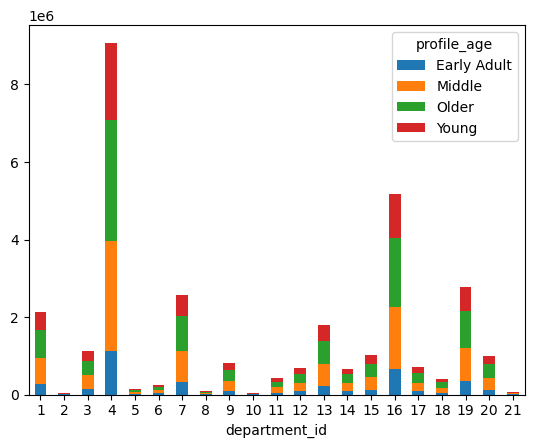

In [19]:
# Create a stacked bar chart of this data.
bar_profile_age_depts = crosstab_depts.plot.bar(rot = 0, stacked = True)

In [20]:
# Export bar chart
bar_profile_age_depts.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age_depts.png'))

#### 04.03.02 Relationship with profiles and regions

In [21]:
crosstab_regions = pd.crosstab(df['region'], df['profile_age'], dropna = False)
crosstab_regions

profile_age,Early Adult,Middle,Older,Young
region,,,,
Midwest,898155,2323069,2455443,1584846
Northeast,679909,1708719,1884229,1191828
South,1314989,3181471,3521421,2293258
West,971465,2511691,2713411,1730660


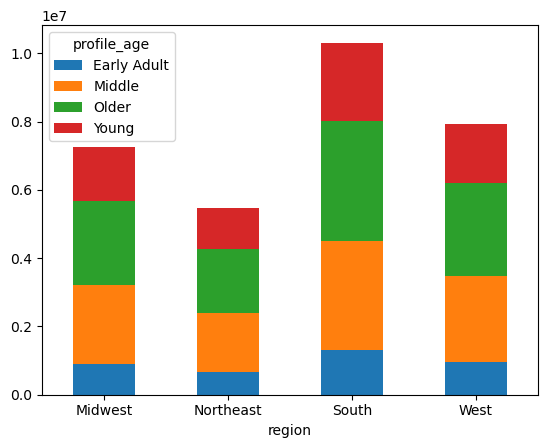

In [22]:
# Create a stacked bar chart of this data.
bar_profile_age_regions = crosstab_regions.plot.bar(rot = 0, stacked = True)

In [23]:
# Export bar chart
bar_profile_age_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_profile_age_regions.png'))